# Mastering Pandas: Series and DataFrames

In this lesson, we will dive into pandas Series and DataFrames.

You will learn how to explore, clean, filter, and analyze real-world data.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

# Load Titanic data from a GitHub URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Print dataset shape
print(df.shape)

# Show first 3 rows
print(df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


# What is a pandas Series?

- A pandas Series is like one column from a spreadsheet.
- It holds data values and an index, which is like row labels.

In [5]:
ages = pd.Series([22, 38, 26, 35] )
print(ages)

0    22
1    38
2    26
3    35
dtype: int64


In [6]:

# Selecting a column as a Series
survived = df['Survived']
print(type(survived))
print(survived.head())


<class 'pandas.core.series.Series'>
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [10]:
# Viewing column names
print("Columns:", df.columns.tolist())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [11]:
# Multiple Filters: Women first class survivors
women_first_survived = df[(df['Sex'] == "female") & (df['Pclass'] == 1) & (df['Survived'] == 1)]
print(women_first_survived[['Name', 'Age']].head())

                                                 Name   Age
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
11                           Bonnell, Miss. Elizabeth  58.0
31     Spencer, Mrs. William Augustus (Marie Eugenie)   NaN
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0


In [12]:
# Aggregating statistics for fare by embarkation port
print(df.groupby("Embarked")['Fare'].agg(['mean', 'min', 'max']))

               mean     min       max
Embarked                             
C         59.954144  4.0125  512.3292
Q         13.276030  6.7500   90.0000
S         27.079812  0.0000  263.0000


In [13]:
# Merging: Adding port names to Embarked codes
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df['Port'] = df['Embarked'].map(port_names)
print(df[['Embarked', 'Port']].drop_duplicates())

   Embarked         Port
0         S  Southampton
1         C    Cherbourg
5         Q   Queenstown
61      NaN          NaN


In [14]:
# Handling dates: Add a fake 'Date' column for demonstration
import numpy as np
from datetime import timedelta

np.random.seed(42)
base_date = pd.Timestamp('1912-04-01')
df['Date'] = [base_date + timedelta(days=int(x)) for x in np.random.randint(0, 30, len(df))]
print(df[['Name', 'Date']].head())

                                                Name       Date
0                            Braund, Mr. Owen Harris 1912-04-07
1  Cumings, Mrs. John Bradley (Florence Briggs Th... 1912-04-20
2                             Heikkinen, Miss. Laina 1912-04-29
3       Futrelle, Mrs. Jacques Heath (Lily May Peel) 1912-04-15
4                           Allen, Mr. William Henry 1912-04-11


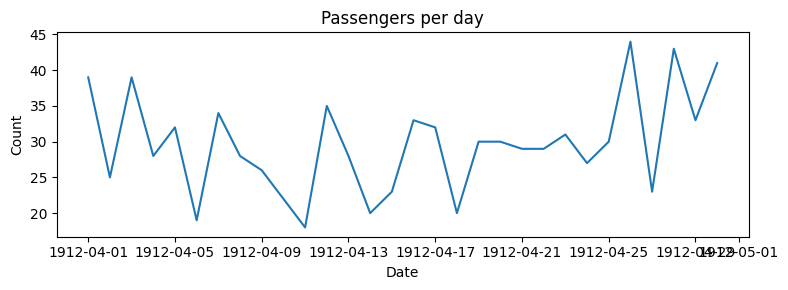

In [15]:
# Simple time series plot: Number of passengers per day
import matplotlib.pyplot as plt

dcount = df['Date'].value_counts().sort_index()
plt.figure(figsize=(8,3))
plt.plot(dcount.index, dcount.values)
plt.title('Passengers per day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


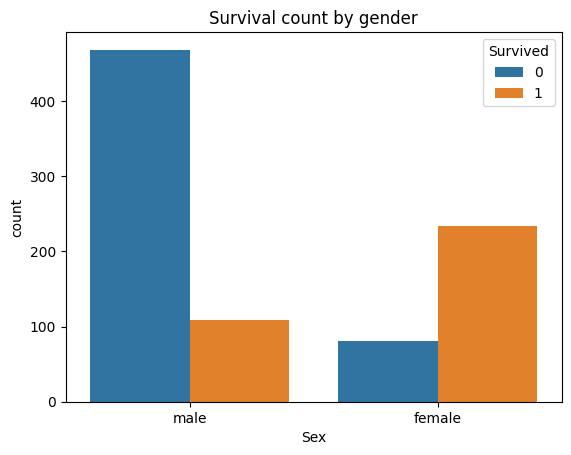

In [16]:
# Data visualization: Survival by gender
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival count by gender')
plt.show()

# Creating and Inspecting DataFrames in Pandas

Welcome to this hands-on session! We will start by introducing DataFrames, the heart of pandas. You will learn to create, explore, and understand tabular data using simple, real-world examples.

In [17]:
# Data setup (Iris Dataset)
np.random.seed(42)
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url)
print(df.shape)
print(df.head(3))

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


In [19]:
print(df['species'].tail(10))

140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, dtype: object


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# Examining column names and data types

# Data Types
print('data types:', df.dtypes111)

# Column Names
print('Column Names:', df.columns.tolist())

data types: sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Column Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


# Indexing and Selecting Data

Pandas lets you grab specific rows or columns using labels or numbers. This way, you can focus on just the part of the data you need.

In [24]:
subset = df[['sepal_length', 'sepal_width']]
print(subset.head())

   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [25]:
# Selecting rows by position by iloc
print(df.iloc[10:15])
# Selecting rows by label by loc
print(df.loc[10:15])

    sepal_length  sepal_width  petal_length  petal_width species
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8          4.0           1.2          0.2  setosa
    sepal_length  sepal_width  petal_length  petal_width species
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa


In [26]:
# Filter data with a condition
long_flowers = df[df['sepal_length'] > 5.0]
print(long_flowers.head())

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
10           5.4          3.7           1.5          0.2  setosa
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa


# Modifying DataFrames

You can add new columns, change values, or drop data as you clean and transform your data.

In [27]:
# Add a new column based on a calculation
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
print(df[['sepal_length', 'sepal_width', 'sepal_ratio']].head())

   sepal_length  sepal_width  sepal_ratio
0           5.1          3.5     1.457143
1           4.9          3.0     1.633333
2           4.7          3.2     1.468750
3           4.6          3.1     1.483871
4           5.0          3.6     1.388889


In [28]:
# Deleting a column
df.drop(columns=['sepal_ratio'], axis=1)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species  sepal_ratio
0           5.1          3.5           1.4          0.2  setosa     1.457143
1           4.9          3.0           1.4          0.2  setosa     1.633333
2           4.7          3.2           1.3          0.2  setosa     1.468750
3           4.6          3.1           1.5          0.2  setosa     1.483871
4           5.0          3.6           1.4          0.2  setosa     1.388889


In [30]:
np.random.seed(42)

# Load Titanic data from a GitHub URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# Print dataset shape
print(titanic_df.shape)

# Show first 3 rows
print(titanic_df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [33]:
# Learn about the Dataframe basic attributes
print("Directory: ", dir(titanic_df))
# Print columns names
print("Columns:", titanic_df.columns.tolist())
# Print dataset shape
print("Indexes:", titanic_df.index)
print("Data types:", titanic_df.dtypes)


Directory:  ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'T', 'Ticket', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__firstlineno__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__n

In [35]:
# When you receive a new, large dataset (e.g., 200+ columns)
columns = [item for item in dir(titanic_df) if not item.startswith('_') and item[0].islower()]
print(f"Available columns: {len(columns)}")
# Quickly see all column names without scrolling

Available columns: 207


# create a function 

In [36]:
def smart_inspect(df, max_columns=50):
    """Smart inspection for large datasets"""
    print(f"Dataset shape: {df.shape}")
    
    if len(df.columns) <= max_columns:
        print("Columns:", df.columns.tolist())
    else:
        print(f"First {max_columns} columns:", df.columns[:max_columns].tolist())
        print(f"... and {len(df.columns) - max_columns} more columns")
    
    # Show most useful methods
    useful_methods = ['head', 'describe', 'info', 'isnull', 'groupby', 'merge']
    print("\nUseful methods available:", useful_methods)

smart_inspect(titanic_df)

Dataset shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Useful methods available: ['head', 'describe', 'info', 'isnull', 'groupby', 'merge']


# Reshaping: Pivot Tables

- Pivot tables help you summarize and compare groups in a table format.
- Let us see how many survived in each class and by sex.

In [38]:
# Make a pivot table for survival by class and sex
table = pd.pivot_table(titanic_df, 
                       values='PassengerId',
                       index=['Pclass'], 
                       columns=['Sex'], 
                       aggfunc='count')

print(table)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


# Mini-Project: Exploratory Data Analysis

- Investigate age, fare, and survival.
- Analyzing and plotting!

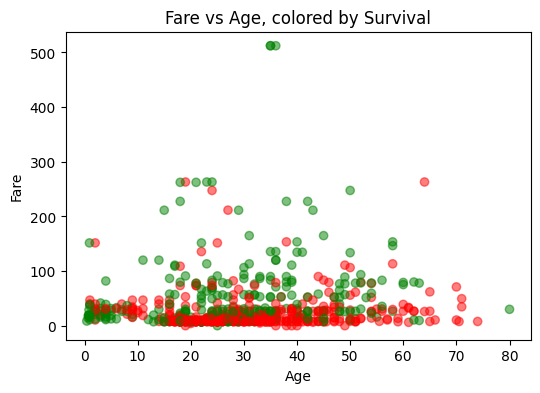

In [40]:
# Visualize Fare vs. Age by Survival
plt.figure(figsize=(6,4))
colors = ['red' if s == 0 else 'green' for s in titanic_df['Survived']]
plt.scatter(titanic_df['Age'], titanic_df['Fare'], c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age, colored by Survival')
plt.show()

# Step 7: Joining DataFrames

join two DataFrames together on a shared column.

In [41]:
# We will make a little demo passengers table and join on the Name.

demo_passengers = pd.DataFrame({
    'Name': [titanic_df.iloc[0]['Name'], titanic_df.iloc[1]['Name']],
    'Extra_Info': ['Friend', 'Colleague']
})

merged = pd.merge(titanic_df, demo_passengers, on='Name', how='left')
print(merged[['Name', 'Extra_Info']].head(3))

                                                Name Extra_Info
0                            Braund, Mr. Owen Harris     Friend
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  Colleague
2                             Heikkinen, Miss. Laina        NaN


In [42]:
# get percent of missing values in each column
missing_percent = titanic_df.isnull().mean() * 100

In [45]:
# get percent of missing values in per column
(titanic_df.isnull().sum()/len(titanic_df) * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [47]:

# See which rows are missing any data
titanic_df[titanic_df.isnull().any(axis=1)].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Exploring Missing Data Visually

- It helps to see missing data with colors or charts.
- Use a heatmap to quickly spot where values are missing in the Titanic dataset.

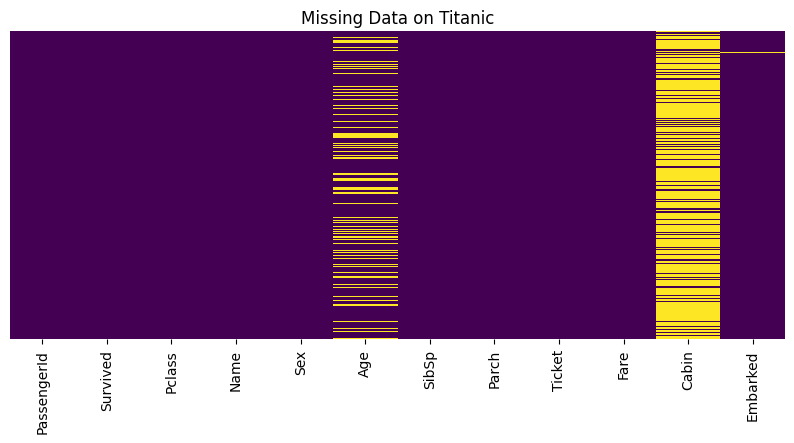

In [48]:
# Draw a heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data on Titanic')
plt.show()

In [50]:
# Count missing values in Cabin by passenger class
titanic_df.groupby("Pclass")["Cabin"].apply(lambda x: x.isnull().mean()).round(2)

Pclass
1    0.19
2    0.91
3    0.98
Name: Cabin, dtype: float64

# Approaches for Handling Missing Data

 - **Drop**: Remove rows or columns with missing data  
 - **Impute**: Fill missing values using statistics or formulas  
 - **Leave As Is**: Sometimes you can work with missingness directly  

In [52]:
# Drop rows where Age is missing  
titanic_df_drop_age = titanic_df.dropna(subset=['Age'])  
print('Original:', titanic_df.shape)  
print('After dropping:', titanic_df_drop_age.shape)

Original: (891, 12)
After dropping: (714, 12)


In [53]:
# Fill missing Age values with the median age
median_age = titanic_df['Age'].median()
titanic_df['Age_filled'] = titanic_df['Age'].fillna(median_age)
print(f'Median Age: {median_age}')
print('Missing after fill:', titanic_df["Age_filled"].isnull().sum())

Median Age: 28.0
Missing after fill: 0


In [54]:
# Fill missing Embarked values with most common port
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked_filled'] = titanic_df['Embarked'].fillna(mode_embarked)
print(f'Most common port: {mode_embarked}')
print('Missing after fill:', titanic_df["Embarked_filled"].isnull().sum())

Most common port: S
Missing after fill: 0


In [55]:
# Mark missing Cabin values with a flag
titanic_df['Cabin_missing'] = titanic_df['Cabin'].isnull().astype(int)
titanic_df[['Cabin', 'Cabin_missing']].head(5)

,Cabin,Cabin_missing
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


# Filling Technique: Forward and Backward Fill
 - **ffill** (forward fill) copies the last known value down.
 - **bfill** (backward fill) uses the next value up.

 These are often used in time series data.

In [56]:
# Demonstrate forward fill and backward fill on small Age sample
sample = titanic_df[['Age']].head(18).copy()
sample.loc[[2, 5], 'Age'] = None
sample['ffill'] = sample['Age'].ffill()
sample['bfill'] = sample['Age'].bfill()
print(sample)

     Age  ffill  bfill
0   22.0   22.0   22.0
1   38.0   38.0   38.0
2    NaN   38.0   35.0
3   35.0   35.0   35.0
4   35.0   35.0   35.0
5    NaN   35.0   54.0
6   54.0   54.0   54.0
7    2.0    2.0    2.0
8   27.0   27.0   27.0
9   14.0   14.0   14.0
10   4.0    4.0    4.0
11  58.0   58.0   58.0
12  20.0   20.0   20.0
13  39.0   39.0   39.0
14  14.0   14.0   14.0
15  55.0   55.0   55.0
16   2.0    2.0    2.0
17   NaN    2.0    NaN


In [57]:
# Impute missing Age by median per Passenger Class
titanic_df['Age_group_median'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
print(titanic_df[['Pclass', 'Age', 'Age_group_median']].head(8))

   Pclass   Age  Age_group_median
0       3  22.0              22.0
1       1  38.0              38.0
2       3  26.0              26.0
3       1  35.0              35.0
4       3  35.0              35.0
5       3   NaN              24.0
6       1  54.0              54.0
7       3   2.0               2.0


In [58]:
# Drop columns with over 70 percent missing values
thresh = 0.7 * len(titanic_df)
titanic_df_reduced = titanic_df.dropna(axis=1, thresh=thresh)
print(f'Columns dropped: {set(titanic_df.columns) - set(titanic_df_reduced.columns)}')

Columns dropped: {'Cabin'}


In [59]:
# Replace placeholder like '?' and 'NA' with true missing values
df2 = titanic_df.copy()
df2.replace(['?', 'NA', '-', ''], pd.NA, inplace=True)
print('Done recoding placeholders.')


Done recoding placeholders.


# Mini-Project: Handling Missing Data for Analysis

- Let us prepare the Titanic data for survival study.
- Apply the best fills for Age and Embarked. Drop columns that are mostly missing.
- This helps make any future analysis trustworthy.

In [60]:
# Pipeline: fill Age by Pclass median, fill Embarked by mode, drop 'Cabin' and rows still missing
clean_df = titanic_df.copy()
clean_df['Age'] = clean_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
clean_df['Embarked'] = clean_df['Embarked'].fillna(clean_df['Embarked'].mode()[0])
clean_df = clean_df.drop(columns=['Cabin'])
clean_df = clean_df.dropna()
print(clean_df.isnull().sum().sum(), 'missing left')
print(clean_df.shape)

0 missing left
(891, 15)


# Troubleshooting Tips for Missing Data

 - Watch out for nonstandard missing codes, like 999 or N/A.
 - Visualize missingness early with plots.
 - Try multiple fill methods; check which gives better analysis.

 Always check for missing data before any modeling.

In [65]:
# Challenge: Identify if a record is missing more than one field
titanic_df["missing_count"] = titanic_df.isnull().sum(axis=1)
challenge_result = titanic_df[titanic_df["missing_count"] > 1]
print(challenge_result.shape)

(158, 17)


# Dealing with Duplicates and Inconsistent Data in Pandas

## In real-world datasets, messy data is very common.  
- Duplicates and inconsistencies can affect your analysis and model quality.

- Find and fix duplicate rows, handle missing or inconsistent values, and clean up your DataFrame with confidence.

# What are duplicates and why do they matter?

 - Duplicates are rows that are identical in all columns.
 - Sometimes data gets entered twice, or combined from multiple sources.

## Duplicate rows can throw off your analysis or statistics.


In [66]:
# Find duplicate rows in the DataFrame
dupes = titanic_df[titanic_df.duplicated()]
print(f"Found {len(dupes)} duplicated rows out of {titanic_df.shape[0]} total.")
print(dupes.head(2))

Found 0 duplicated rows out of 891 total.
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Age_filled, Embarked_filled, Cabin_missing, Age_group_median, missing_count]
Index: []


In [67]:
# Remove duplicate rows
df_no_dupes = titanic_df.drop_duplicates()
print("Rows after removing duplicates:", df_no_dupes.shape[0])


Rows after removing duplicates: 891


In [68]:
# Remove duplicates based only on the 'Name' column
names_no_dupes = titanic_df.drop_duplicates(subset=["Name"])
print("Unique passenger names:", names_no_dupes.shape[0])

Unique passenger names: 891


# Spotting and Fixing Inconsistent Data
## Spotting unique values can reduce inconsistency
 - Real-world datasets often have slightly different entries for the same thing.
 - For example, 'male', 'Male', and 'MALE' might all appear in the 'Sex' column.
 - Misspellings or weird formatting sneak in.

In [70]:
# Check unique values in 'Sex' and 'Embarked'
print("Unique in 'Sex':", titanic_df['Sex'].unique())
print("Unique in 'Embarked':", titanic_df['Embarked'].unique())

Unique in 'Sex': ['male' 'female']
Unique in 'Embarked': ['S' 'C' 'Q' nan]


In [2]:
np.random.seed(42)

# Load Titanic data from a GitHub URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Print dataset shape
print(df.shape)

# Show first 3 rows
print(df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [3]:
# Standardizing the Sex column:
df['Sex'] = df['Sex'].str.lower()
print(df['Sex'].unique())

['male' 'female']


In [5]:
# Fix inconsistent codes or blanks in 'Embarked' (note the correct spelling)
df['Embarked'] = df['Embarked'].fillna('Unknown')  # Note: 'Embarked', not 'Embanked'
df['Embarked'] = df['Embarked'].str.strip().str.upper()
print(df['Embarked'].value_counts())

Embarked
S          644
C          168
Q           77
UNKNOWN      2
Name: count, dtype: int64


In [6]:
# Find obvious typos: any unexpected Embarked codes?
valid_codes = {'C', 'Q', 'S', 'UNKNOWN'}
weird_embarked = df[~df['Embarked'].isin(valid_codes)]
print(weird_embarked[['PassengerId', 'Embarked']].head())

Empty DataFrame
Columns: [PassengerId, Embarked]
Index: []


In [7]:
# Capitalize names: fix inconsistent cases in the 'Name' column
df['Name'] = df['Name'].str.title()
print(df['Name'].head(2))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object


In [8]:
# Fill missing ages with the median age
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
print(f"Now missing age values: {df['Age'].isnull().sum()}")

Now missing age values: 0


In [9]:
# Bonus: An end-to-end cleaning pipeline for the Titanic data
df_cleaned = (
    df.drop_duplicates()
    .assign(
        Sex=lambda x: x['Sex'].str.lower(),
        Embarked=lambda x: x['Embarked'].fillna('Unknown').str.strip().str.upper(),
        Name=lambda x: x['Name'].str.title(),
        Age=lambda x: x['Age'].fillna(x['Age'].median())
    )
)
print(df_cleaned.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [ ]:
# Save cleaned data for later use
df_cleaned.to_csv('titanic_cleaned.csv', index=False)
print('Dataset saved as titanic_cleaned.csv!')


# This is likely the beginning of a tutorial or lesson that covers:

## Why renaming columns/indexes is important (for readability, consistency, etc.)

- How to rename columns in a DataFrame

- How to rename indexes (row labels)

- Practical examples using the Titanic dataset

- The lesson would probably include code examples showing methods like:

- df.rename() for renaming columns

- df.columns assignment for bulk renaming

## Index renaming techniques

In [10]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
# Rename 'Sex' column to 'Gender' and 'Pclass' to 'PassengerClass'
df_renamed = df.rename(columns={'Sex': 'Gender', 'Pclass': 'PassengerClass'})
print(df_renamed.columns[:7])

Index(['PassengerId', 'Survived', 'PassengerClass', 'Name', 'Gender', 'Age',
       'SibSp'],
      dtype='object')


In [12]:
print('Sex' in df.columns)  # True - original unchanged
print('Gender' in df.columns)  # False - new name only in df_renamed

True
False


In [13]:
# Rename multiple columns; abbreviate Age and update Embarked
df.rename(columns={'Age': 'A', 'Embarked': 'PortOfEmbarkation'}, inplace=True)
print(df.columns[:7])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'A', 'SibSp'], dtype='object')


In [14]:
# removing white space
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

In [15]:
# replacing character pattern 
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters

In [16]:
# capitilizing pattern
df.columns = df.columns.str.title()  # Title Case
df.columns = df.columns.str.capitalize()  # Capitalize first letter

# To rename DataFrame row indexes, use the rename() method with the index argument.

--This is helpful when your index is not just numbers, for example after grouping.

In [18]:
# Example: set 'PassengerId' as index, then rename some index values
df_indexed = df.set_index('PassengerId')
df_indexed = df_indexed.rename(index={1: 'FirstPassenger', 2: 'SecondPassenger'})
print(df_indexed.head(3))

KeyError: "None of ['PassengerId'] are in the columns"